ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (36,) and arg 2 with shape (6913,).

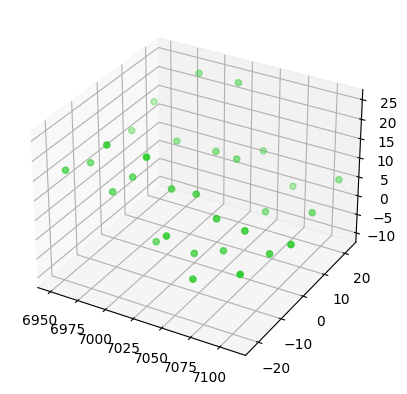

In [5]:
import pandas as pd
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Set name of Excel file to read containing known points
file_known = 'known_points.xlsx'

# Set name of sheet to read from Excel file
sheet_known = 'Sheet1'

# Read data from Excel sheet into a dataframe
df = pd.read_excel(file_known, sheet_name=sheet_known, skiprows=7)

# Extract column names starting with 'Y' into new dataframe of known Y-coords
df_y = df[df.columns[df.columns.str.startswith('Y')]]

# Extract column names starting with 'Z' into new dataframe of known Z-coords
df_z_known = df[df.columns[df.columns.str.startswith('Z')]]

# Flatten dataframe values into 1D array (matri format -> vector format)
y_known = df_y.values.flatten()
z_known = df_z_known.values.flatten()

# Extract known x-values
x_known = df['X']

# Create X-array by repeating itself as many times as there are Y-columns
# This will create matching(x, y)-points between arrays x and y
x_known = np.repeat(x_known, len(df_y.columns))

# Mirror known y-values and add corresponding x- and y-values
x_known = np.append(x_known, x_known)
y_known = np.append(y_known, -y_known)
z_known = np.append(z_known, z_known)

# Arrange known (x, y) points to fit input for interpolation
xy_known = np.array(list(zip(x_known, y_known)))

# Set names and read Excel file with nodes to be interpolated
file_nodes = 'points_to_be_interpolated.xlsx'
sheet_nodes = 'XLSX-Export'
df_nodes = pd.read_excel(file_nodes, sheet_name=sheet_nodes)

# Extract x- and y-coordinates of nodes to be interpolated
x_nodes = df_nodes['X [m]']
y_nodes = df_nodes['Y [m]']

# Extract node numbers for points to be interpolated
node_no = df_nodes['NR']

# Perform interpolation calculation
points_interpolated = griddata(xy_known, z_known, (x_nodes, y_nodes), method='cubic')


####################
### Exercise 1.2 ###
####################
# Create figure object
fig = plt.figure()

# Create axis object for 3D plot
ax = fig.add_subplot(111, projection='3d')

# Plot known points as 3D scatter plot (ax.scatter(...))
    # <Put plotting code here!>
ax.scatter(x_known, y_known,z_known, '-.', color='limegreen')
# Plot interpolated points as 3D scatter plot
    # <Put plotting code here!>
ax.scatter(x_known, y_known, points_interpolated, '.', color='cornflowerblue', s=0.1)
# Show figure
    # <Put plotting code here!>
plt.show()

####################
### Exercise 1.3 ###
####################
# Write Sofistik input code to .dat-file for applying the interpolated z-values as 
# imposed displacement load in all points (x, y)
    # <Put code that creates and writes to a .dat file here!>
with open(f'generated_file.dat', 'w') as file:

    # Write the 'static' text to file
    file.write('''+PROG SOFILOAD 

LC 25 type 'SL' fact 1.0 facd 0.0 titl 'LT settlement all nodes'  \n''')

    # Write the 'variable' text to file with node number/settlement pairs
    for node, settlement in zip(node_no, z_interpolated):
        file.write(f'  POIN NODE {node} WIDE 0 TYPE WZZ {settlement} \n')

    # Write 'static' END statement to file
    file.write('END')